Histopathologic Oral Cancer Detection using CNNs

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50, VGG16

import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.core.transforms_interface import ImageOnlyTransform
#from albumentations.keras import ToTensorV2

from tensorflow.config import list_physical_devices


Load Dataset Images

In [8]:
normal_path = 'OralCancer/Normal'
oscc_path = 'OralCancer/OSCC'

IMG_HEIGHT, IMG_WIDTH = 224, 224

images = []
labels = []

# Function to load images and assign labels
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        if os.path.isfile(filepath):  # Check if it's a file
            try:
                # Read and resize the image
                img = cv2.imread(filepath)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {filepath}: {e}")

# Load Normal and OSCC images
load_images_from_folder(normal_path, label=0)  # 0 for Normal
load_images_from_folder(oscc_path, label=1)    # 1 for OSCC

# Convert to NumPy arrays for compatibility with TensorFlow
images = np.array(images)
labels = np.array(labels)

print(f"Total images loaded: {len(images)}")
print(f"Image shape: {images[0].shape}")
print(f"Labels distribution: {np.unique(labels, return_counts=True)}")


Total images loaded: 4946
Image shape: (224, 224, 3)
Labels distribution: (array([0, 1]), array([2435, 2511], dtype=int64))


Some Plots

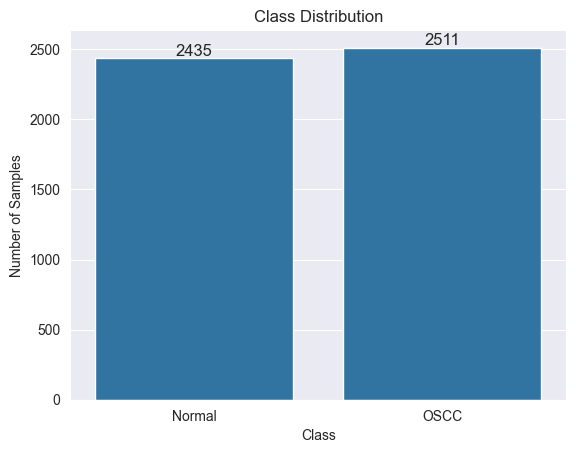

In [10]:
label_counts = np.unique(labels, return_counts=True)
class_names = ['Normal', 'OSCC']

ax = sns.barplot(x=class_names, y=label_counts[1])
for i, count in enumerate(label_counts[1]):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=12)
plt.title("Class Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.show()

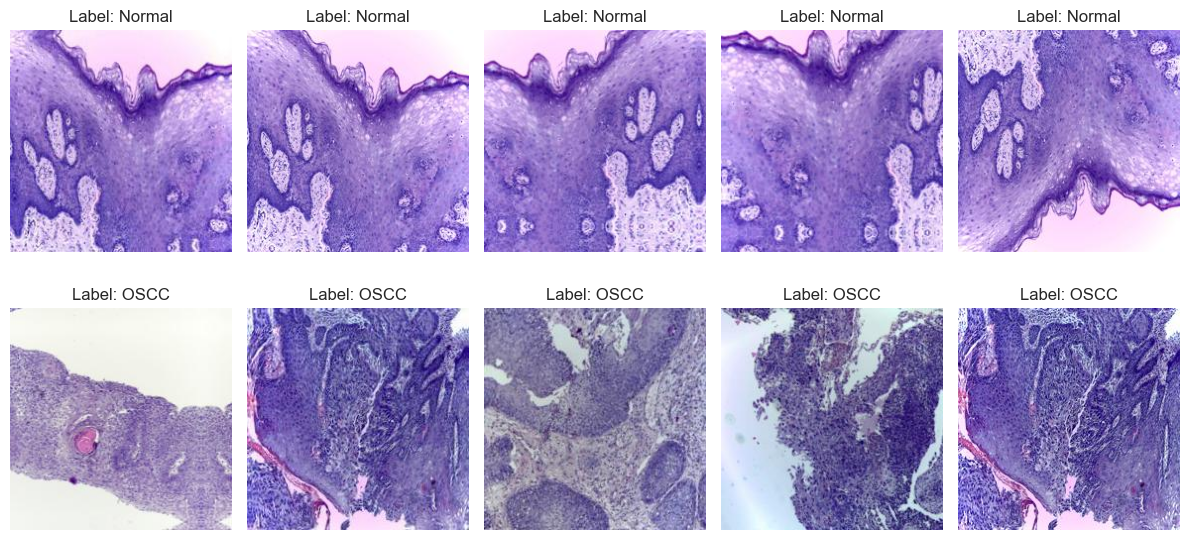

In [14]:
plt.figure(figsize=(12, 6))

# Indices for both classes
normal_indices = np.where(labels == 0)[0]
oscc_indices = np.where(labels == 1)[0]

# Display 5 images from each class
for i in range(5):
    # Plot Normal images
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[normal_indices[i]])
    plt.title(f"Label: Normal")
    plt.axis("off")

    # Plot OSCC images
    plt.subplot(2, 5, i + 6)
    plt.imshow(images[oscc_indices[i]])
    plt.title(f"Label: OSCC")
    plt.axis("off")

plt.tight_layout()
plt.show()
